# Classification and Regression, Part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.transformations.panel.reduce import Tabularizer

## Load the data

#### Classification

In [2]:
from sktime.datasets import load_gunpoint

In [3]:
X_gunpoint, y_gunpoint = load_gunpoint(return_X_y=True, return_type="numpy3D")
X_gunpoint.shape, y_gunpoint.shape

((200, 1, 150), (200,))

In [4]:
np.unique(y_gunpoint, return_counts=True)

(array(['1', '2'], dtype='<U1'), array([100, 100]))

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
y_gunpoint = le.fit_transform(y_gunpoint)

In [7]:
np.unique(y_gunpoint, return_counts=True)

(array([0, 1]), array([100, 100]))

#### Regression

In [8]:
X_covid = np.load("data/X_covid.npy")
y_covid = np.load("data/y_covid.npy")
X_covid.shape, y_covid.shape

((201, 1, 84), (201,))

## Split the data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_gunpoint_train, X_gunpoint_test, y_gunpoint_train, y_gunpoint_test = train_test_split(X_gunpoint, y_gunpoint, random_state=0)
X_gunpoint_train.shape, X_gunpoint_test.shape, y_gunpoint_train.shape, y_gunpoint_test.shape

((150, 1, 150), (50, 1, 150), (150,), (50,))

In [11]:
X_train_covid, X_test_covid, y_train_covid, y_test_covid = train_test_split(X_covid, y_covid, random_state=0)
X_train_covid.shape, X_test_covid.shape, y_train_covid.shape, y_test_covid.shape

((150, 1, 84), (51, 1, 84), (150,), (51,))

## Deep Learning based

### MLP

#### Classification

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
mlp = Tabularizer() * MLPClassifier(random_state=0)

In [14]:
mlp.fit(X_gunpoint_train, y_gunpoint_train)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SklearnClassifierPipeline(classifier=MLPClassifier(random_state=0),
                          transformers=[Tabularizer()])

In [15]:
mlp.score(X_gunpoint_test, y_gunpoint_test)

0.98

#### Regression

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
mlp = Tabularizer() * MLPRegressor(random_state=0, verbose=True)

In [18]:
mlp.fit(X_train_covid, y_train_covid)

Iteration 1, loss = 119901.71504296
Iteration 2, loss = 73789.36936212
Iteration 3, loss = 40342.14866093
Iteration 4, loss = 18901.53253307
Iteration 5, loss = 7257.18181857
Iteration 6, loss = 3694.82822453
Iteration 7, loss = 5967.27812827
Iteration 8, loss = 11200.74335727
Iteration 9, loss = 16506.50087990
Iteration 10, loss = 19915.56306820
Iteration 11, loss = 20735.24183149
Iteration 12, loss = 19201.77849948
Iteration 13, loss = 16027.60798883
Iteration 14, loss = 12161.52230790
Iteration 15, loss = 8113.06889324
Iteration 16, loss = 4691.02362060
Iteration 17, loss = 2359.80159588
Iteration 18, loss = 1207.02592033
Iteration 19, loss = 1137.63851692
Iteration 20, loss = 1845.38718976
Iteration 21, loss = 2937.13491876
Iteration 22, loss = 4035.56723783
Iteration 23, loss = 4848.22007688
Iteration 24, loss = 5193.99412689
Iteration 25, loss = 5009.25476979
Iteration 26, loss = 4348.85029535
Iteration 27, loss = 3382.22773781
Iteration 28, loss = 2332.13884314
Iteration 29, los

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SklearnRegressorPipeline(regressor=MLPRegressor(random_state=0, verbose=True),
                         transformers=[Tabularizer()])

In [19]:
mlp.score(X_test_covid, y_test_covid)

-530996.4918941149

### CNN

In [20]:
from sktime.classification.deep_learning import CNNClassifier

In [21]:
#!pip install sktime[dl]
#!pip install tensorflow

In [22]:
cnn = CNNClassifier(n_conv_layers=2, random_state=0, verbose=True, n_epochs=100)

In [23]:
cnn.fit(X_gunpoint_train, y_gunpoint_train)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 144, 6)         │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 48, 6)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 42, 12)         │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 14, 12)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 168)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 902 (3.52 KB)

 Trainable params: 902 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4415 - loss: 0.7114  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4712 - loss: 0.7055
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5632 - loss: 0.6892
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7741 - loss: 0.6772
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7901 - loss: 0.6533
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.6087
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7831 - loss: 0.5582
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7857 - loss: 0.5099
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7666 - loss: 0.4729
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.7895 - loss: 0.4455
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7689 - loss: 0.4261
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - a

CNNClassifier(n_epochs=100, random_state=0, verbose=True)

In [24]:
cnn.score(X_gunpoint_test, y_gunpoint_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.98

### RNN

In [25]:
from sktime.classification.deep_learning import SimpleRNNClassifier

In [26]:
rnn = SimpleRNNClassifier(random_state=0, verbose=True)

In [27]:
rnn.fit(X_gunpoint_train, y_gunpoint_train)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3910 - loss: 0.4926 - learning_rate: 0.0010
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.5000 - learning_rate: 0.0010
E

SimpleRNNClassifier(verbose=True)

In [28]:
rnn.score(X_gunpoint_test, y_gunpoint_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/classification/deep_learning/base.py:104: RuntimeWarning: invalid value encountered in divide
  probs = probs / probs.sum(axis=1, keepdims=1)


ValueError: 'a' cannot be empty unless no samples are taken

In [29]:
rnn.summary().keys()

dict_keys(['accuracy', 'loss', 'learning_rate'])

### LSTM

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [31]:
lstm = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [32]:
# Train the model with a validation split
history = lstm.fit(
    X_gunpoint_train[:, 0, :], 
    y_gunpoint_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4233 - loss: 0.8990 - val_accuracy: 0.4667 - val_loss: 0.6887
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5910 - loss: 0.6487 - val_accuracy: 0.6333 - val_loss: 0.6176
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6802 - loss: 0.5699 - val_accuracy: 0.7667 - val_loss: 0.5508
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6892 - loss: 0.5392 - val_accuracy: 0.7667 - val_loss: 0.5113
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6892 - loss: 0.5203 - val_accuracy: 0.7667 - val_loss: 0.4780
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7150 - loss: 0.4880 - val_accuracy: 0.8333 - val_loss: 0.4449
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7850 - loss: 0.4536 - val_accuracy: 0.8667 - val_loss: 0.4143
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8083 - loss: 0.4287 - val_accuracy: 0.8667 - val_loss: 0.3881

In [33]:
lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,669 (162.77 KB)

 Trainable params: 13,889 (54.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,780 (108.52 KB)

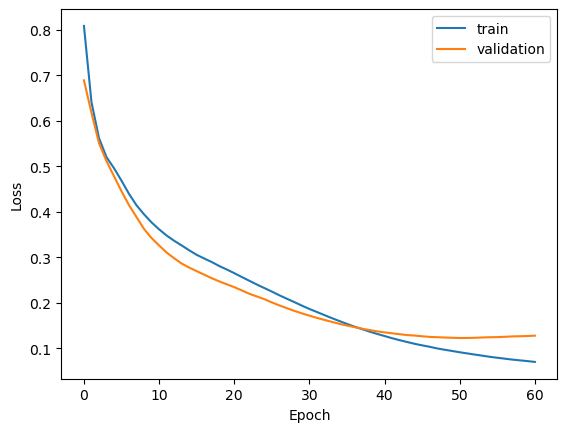

In [34]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

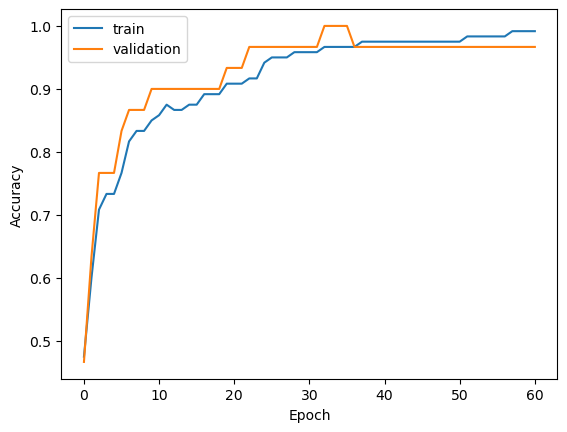

In [35]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
y_pred = np.round(lstm.predict(X_gunpoint_test[:, 0, :]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_gunpoint_test, y_pred)

0.96

### ResNet

In [39]:
from sktime.classification.deep_learning import ResNetClassifier

In [40]:
resnet = ResNetClassifier(n_epochs=10, random_state=0, verbose=True)

In [41]:
resnet.fit(X_gunpoint_train, y_gunpoint_train)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 150, 64)   │        576 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 150, 64)   │        256 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 150, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 150, 64)   │     20,544 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 64)   │        256 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 150, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 150, 64)   │        128 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 150, 64)   │     12,352 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 64)   │        256 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 64)   │        256 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 150, 64)   │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 150, 64)   │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 150, 128)  │     65,664 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 150, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 150, 128)  │     82,048 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 150, 128)  │          0 │ batch_normalizat

 Total params: 506,818 (1.93 MB)

 Trainable params: 504,258 (1.92 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6647 - loss: 1.2227
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7024 - loss: 0.5066
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7552 - loss: 0.4858
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7961 - loss: 0.4071
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9213 - loss: 0.2745
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9019 - loss: 0.2689
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8845 - loss: 0.2739
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9426 - loss: 0.1881
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9331 - loss: 0.1798
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9011 - loss: 0.2803


ResNetClassifier(n_epochs=10, random_state=0, verbose=True)

In [42]:
resnet.score(X_gunpoint_test, y_gunpoint_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


0.52

### InceptionTime

In [43]:
from sktime.classification.deep_learning import InceptionTimeClassifier

In [44]:
inception = InceptionTimeClassifier(random_state=0, verbose=True, n_epochs=10)

In [45]:
inception.fit(X_gunpoint_train, y_gunpoint_train)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 150, 1)    │          0 │ input_layer_4[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 150, 32)   │      1,280 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 150, 32)   │        640 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 150, 32)   │        320 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 150, 32)   │         32 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 150, 128)  │          0 │ conv1d_13[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_14[0][0],  │
│                     │                   │            │ conv1d_15[0][0],  │
│                     │                   │            │ conv1d_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ concatenate[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 150, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 150, 32)   │      4,096 │ activation_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 150, 128)  │          0 │ activation_9[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 150, 32)   │     40,960 │ conv1d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 150, 32)   │     20,480 │ conv1d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 150, 32)   │     10,240 │ conv1d_17[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 150, 32)   │      4,096 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 150, 128)  │          0 │ conv1d_18[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_19[0][0],  │
│                     │                   │            │ conv1d_20[0][0],  │
│                     │                   │            │ conv1d_21[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ concatenate_1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 150, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 422,498 (1.61 MB)

 Trainable params: 420,450 (1.60 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5654 - loss: 0.7315 - learning_rate: 0.0010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8168 - loss: 0.3799 - learning_rate: 0.0010
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9736 - loss: 0.2253 - learning_rate: 0.0010
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9566 - loss: 0.1402 - learning_rate: 0.0010
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 0.0649 - learning_rate: 0.0010
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9908 - loss: 0.0464 - learning_rate: 0.0010
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.0283 - learning_rate: 0.0010
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0204 - learning_rate: 0.0010
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.0139 - learning_rate: 0.0010
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 

InceptionTimeClassifier(n_epochs=10, random_state=0, verbose=True)

In [46]:
inception.score(X_gunpoint_test, y_gunpoint_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


0.72

### LSTM + FCN

In [47]:
from sktime.classification.deep_learning import LSTMFCNClassifier

In [48]:
lstmfcn = LSTMFCNClassifier(n_epochs=10, random_state=0, verbose=True)

In [49]:
lstmfcn.fit(X_gunpoint_train, y_gunpoint_train)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 150, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_44 (Conv1D)  │ (None, 150, 128)  │      1,152 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_44[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 150, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_45 (Conv1D)  │ (None, 150, 256)  │    164,096 │ activation_17[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 256)  │      1,024 │ conv1d_45[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 150, 256)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_46 (Conv1D)  │ (None, 150, 128)  │     98,432 │ activation_18[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 1, 150)    │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 128)  │        512 │ conv1d_46[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 8)         │      5,088 │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 150, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 8)         │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_19[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 136)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 2)         │        274 │ concatenate_6[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 271,090 (1.03 MB)

 Trainable params: 270,066 (1.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5248 - loss: 0.6940 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6666 - loss: 0.5806 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7029 - loss: 0.5531 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6817 - loss: 0.5551
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7682 - loss: 0.5021
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7893 - loss: 0.4872
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7311 - loss: 0.4795
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8175 - loss: 0.4436 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7964 - loss: 0.4307
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8105 - loss: 0.4182


LSTMFCNClassifier(n_epochs=10, random_state=0, verbose=True)

In [50]:
lstmfcn.score(X_gunpoint_test, y_gunpoint_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


0.52

### TapNet

In [51]:
from sktime.classification.deep_learning import TapNetClassifier

In [52]:
# !pip install keras-self-attention

In [54]:
tapnet = TapNetClassifier(random_state=0, verbose=True, n_epochs=10)

ModuleNotFoundError: This functionality requires package 'keras-self-attention' to be present in the python environment, but 'keras-self-attention' was not found. To install the requirement 'keras-self-attention', please run: pip install keras-self-attention` 

In [ ]:
%%time
tapnet.fit(X_gunpoint_train, y_gunpoint_train)

In [ ]:
tapnet.score(X_gunpoint_test, y_gunpoint_test)

## Kernel-based

In [55]:
from sktime.classification.kernel_based import RocketClassifier

In [56]:
%%time
rocket = RocketClassifier(random_state=0, rocket_transform="rocket")
rocket.fit(X_gunpoint_train, y_gunpoint_train)
rocket.score(X_gunpoint_test, y_gunpoint_test)

CPU times: user 8.68 s, sys: 2.14 s, total: 10.8 s
Wall time: 8.51 s


0.52

In [57]:
%%time
rocket = RocketClassifier(random_state=0, rocket_transform="minirocket")
rocket.fit(X_gunpoint_train, y_gunpoint_train)
rocket.score(X_gunpoint_test, y_gunpoint_test)

CPU times: user 5.45 s, sys: 4.07 s, total: 9.52 s
Wall time: 5.2 s


0.52

In [58]:
# %%time
## slow
# rocket = RocketClassifier(random_state=0, rocket_transform="multirocket")
# rocket.fit(X_gunpoint_train, y_gunpoint_train)
# rocket.score(X_gunpoint_test, y_gunpoint_test)

## Ensemble Hybrid


In [59]:
from sktime.classification.hybrid import HIVECOTEV2

In [60]:
# %%time
# # slow
# hivecote = HIVECOTEV2(random_state=0)
# hivecote.fit(X_gunpoint_train, y_gunpoint_train)
# hivecote.score(X_gunpoint_test, y_gunpoint_test)

Some newer models are available only in the AEON library https://www.aeon-toolkit.org/en/stable/index.html. The syntax is the same as sktime.

In [62]:
from aeon.classification.convolution_based import MultiRocketHydraClassifier

In [63]:
mrhydra = MultiRocketHydraClassifier(n_kernels=100)  # increase for better performance
mrhydra.fit(X_gunpoint_train, y_gunpoint_train)
mrhydra.score(X_gunpoint_test, y_gunpoint_test)

1.0

# XAI

### Integrated Gradients

In [64]:
# !pip install alibi

In [66]:
from alibi.explainers import IntegratedGradients

In [67]:
ig = IntegratedGradients(lstm)

In [68]:
explanation = ig.explain(X_gunpoint_train[0:1, 0, :], target=y_gunpoint_train[0:1])
attributions = explanation.attributions


2025-03-18 13:57:40.568791: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


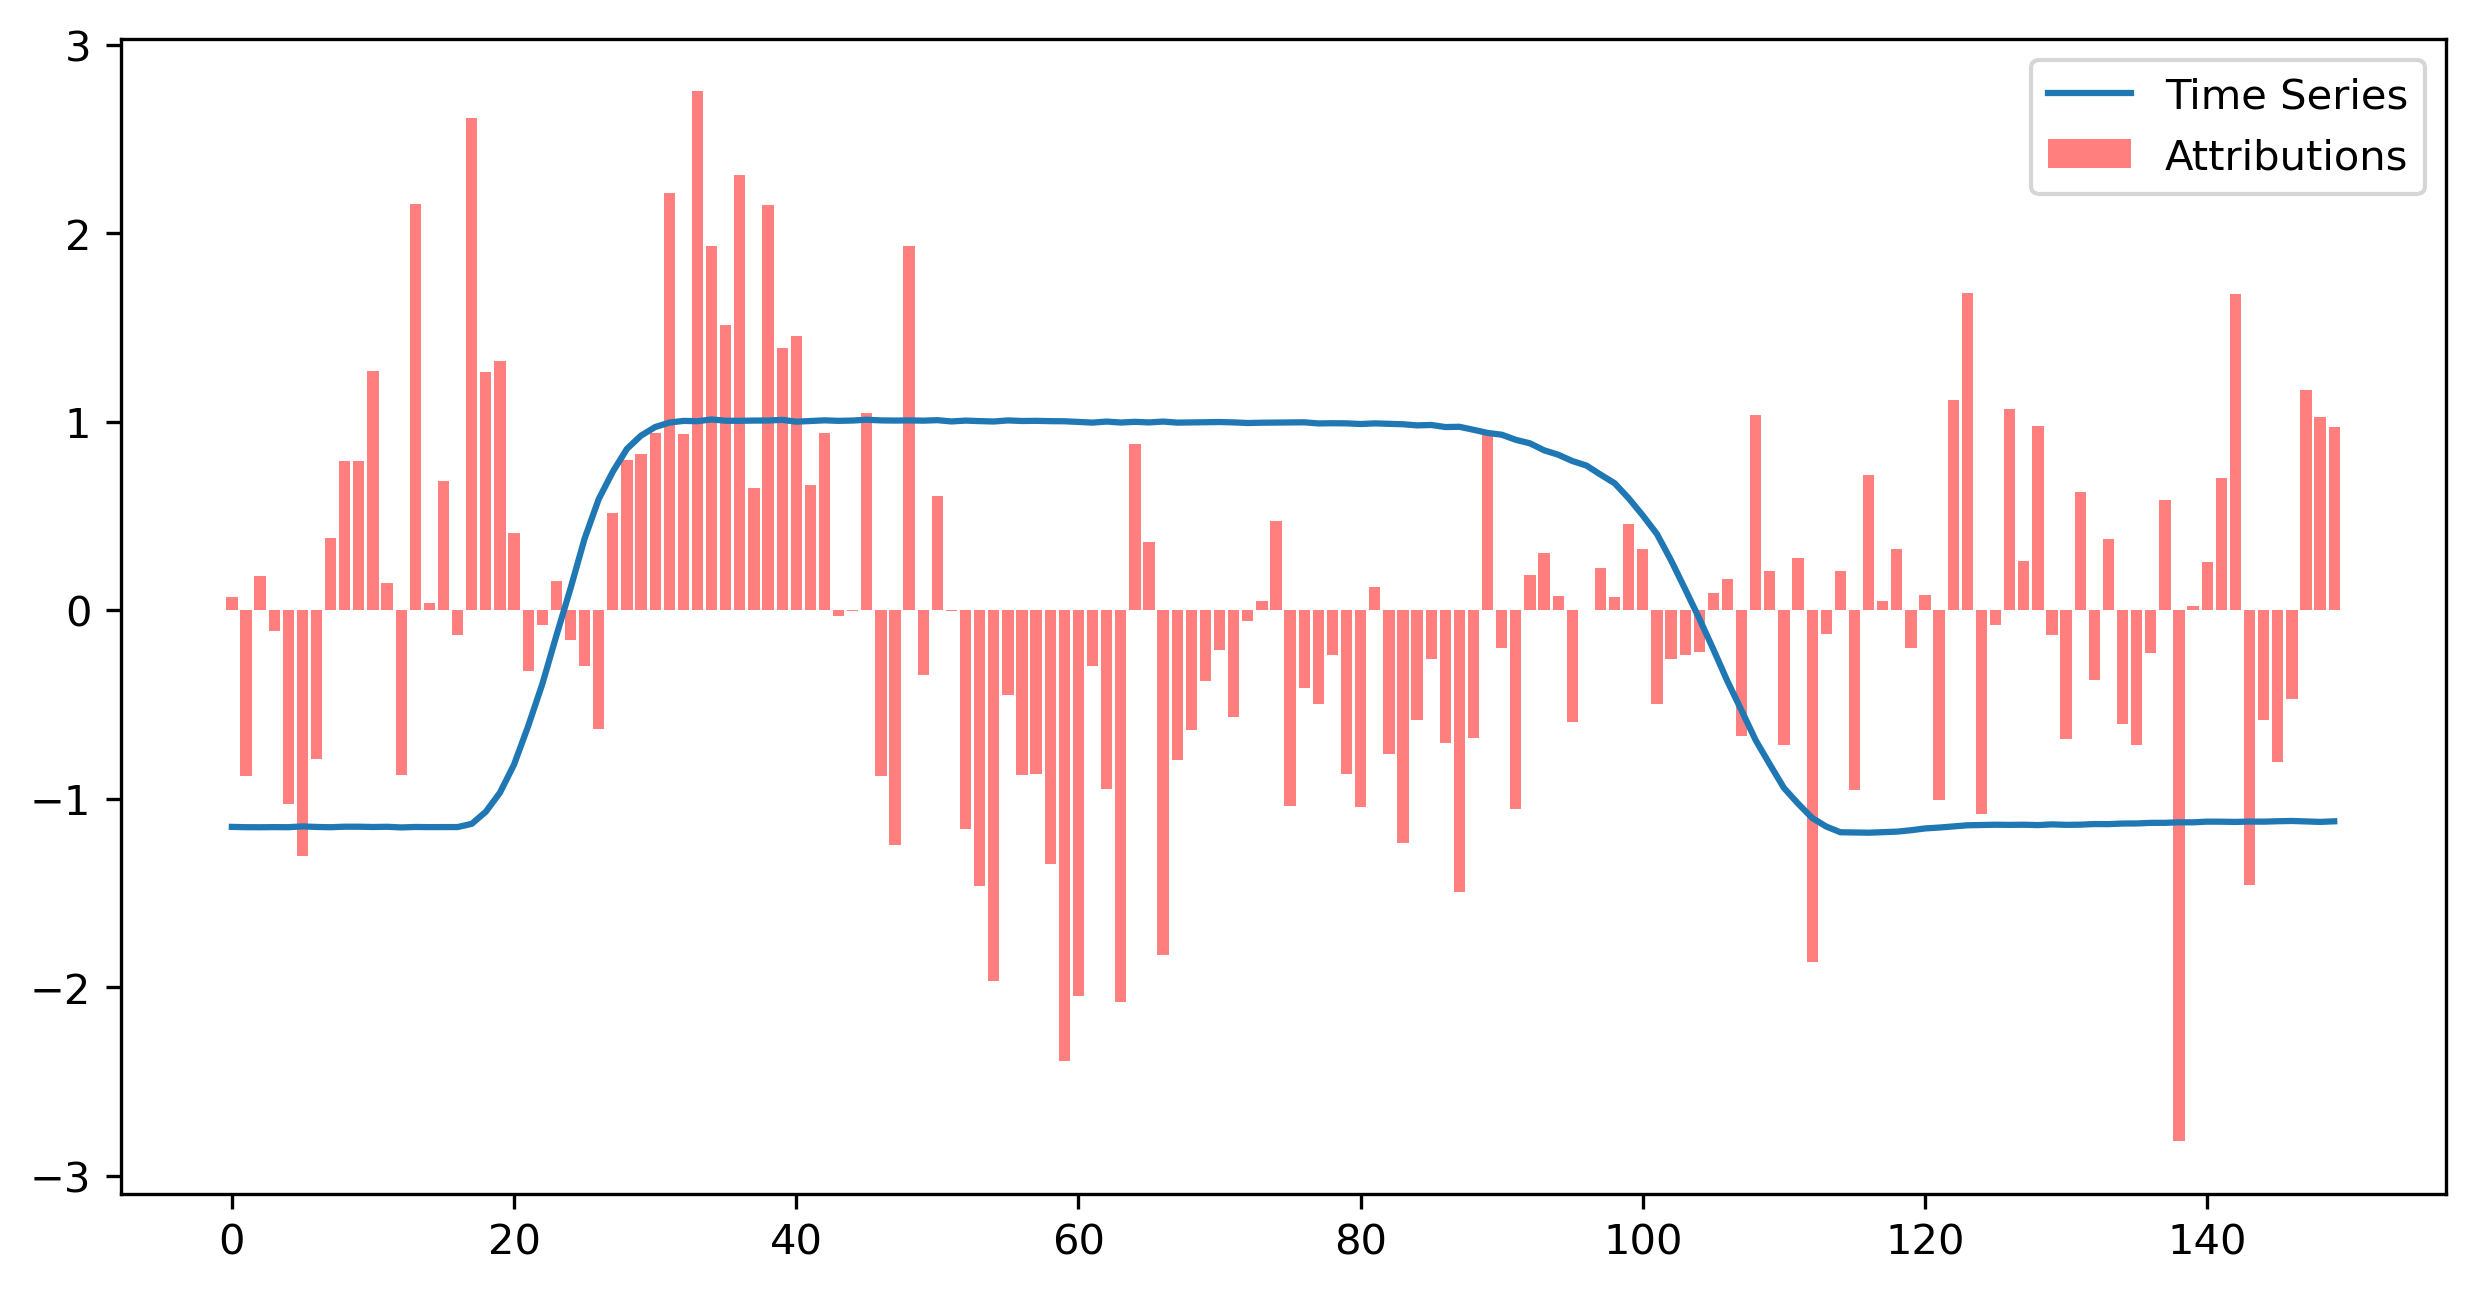

In [69]:
plt.figure(dpi=300, figsize=(10, 5))
attributions_scaled = (attributions[0] - attributions[0].mean()) / attributions[0].std()  # scale attributions for visualization
plt.plot(X_gunpoint_train[0, 0, :], label="Time Series")
plt.bar(np.arange(0, len(attributions_scaled.ravel())), attributions_scaled.ravel(), alpha=0.5, color="red", label="Attributions")
plt.legend()
plt.show()

### Subsequences

In [70]:
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [71]:
trf = RandomShapeletTransform(n_shapelet_samples=100, random_state=0)
dt = DecisionTreeClassifier(random_state=0)

In [72]:
X_train_trf = trf.fit_transform(X_gunpoint_train, y_gunpoint_train)
X_test_trf = trf.transform(X_gunpoint_test)

In [73]:
dt.fit(X_train_trf, y_gunpoint_train)

DecisionTreeClassifier(random_state=0)

In [74]:
dt.score(X_test_trf, y_gunpoint_test)

0.94

In [75]:
shapelets = trf.shapelets

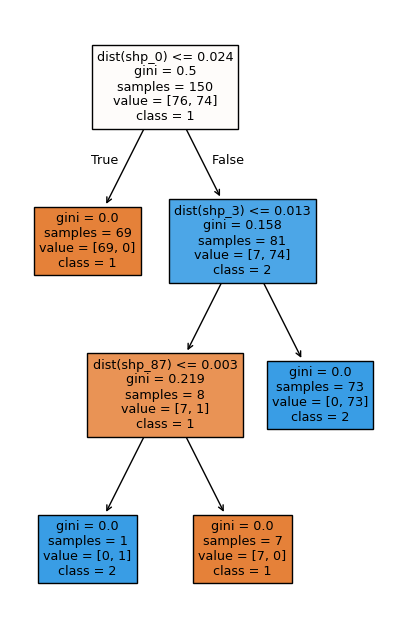

In [76]:
plt.figure(figsize=(5, 8))
plot_tree(dt, class_names=le.classes_, feature_names=[f"dist(shp_{i})" for i in range(X_train_trf.shape[1])], filled=True)
plt.show()

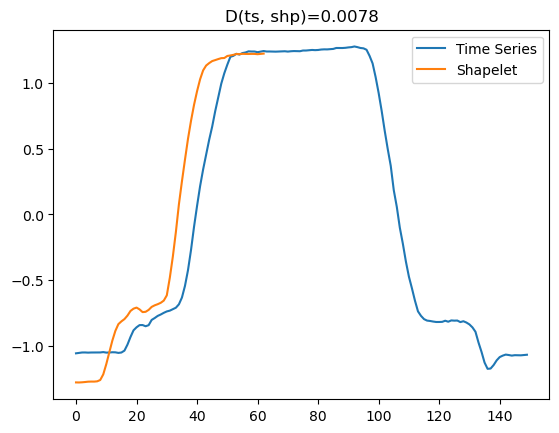

In [77]:
plt.plot(X_gunpoint_test[0, 0, :], label="Time Series")
plt.plot(shapelets[dt.tree_.feature[0]][-1], label="Shapelet")
plt.title(f"D(ts, shp)={np.round(X_test_trf.values[0, 0], 4)}")
plt.legend()
plt.show()

### Counterfactuals

In [78]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from scipy.spatial import distance_matrix

In [79]:
clf = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="euclidean")

In [80]:
clf.fit(X_gunpoint_train, y_gunpoint_train)

KNeighborsTimeSeriesClassifier(distance='euclidean')

In [81]:
clf.score(X_gunpoint_test, y_gunpoint_test)

0.92

In [82]:
y_pred = clf.predict(X_gunpoint_test)

In [83]:
x = X_gunpoint_test[0].ravel()
x_label = y_pred[0]

In [84]:
# take instances with a different predicted label w.r.t. x
counterfactuals_idxs = np.argwhere(y_pred != x_label).ravel()
counterfactuals = X_gunpoint_test[counterfactuals_idxs]

In [85]:
%%time
dist_x_counterfactuals = distance_matrix(x.reshape(1,-1), counterfactuals[:, 0, :])

CPU times: user 481 μs, sys: 326 μs, total: 807 μs
Wall time: 598 μs


In [86]:
# find the index of the closest one
closest_counterfactual_idx = np.argsort(dist_x_counterfactuals).ravel()[0]
closest_counterfactual_idx

14

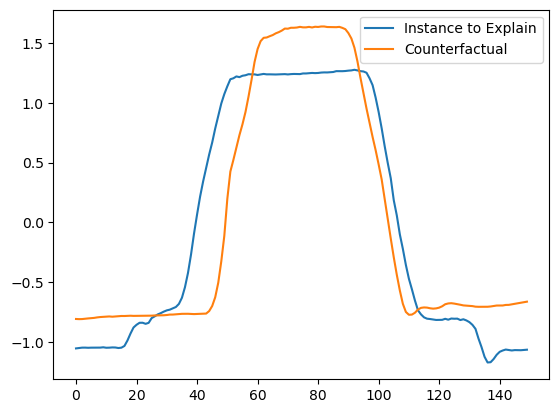

In [87]:
plt.plot(X_gunpoint_test[0, 0, :], label="Instance to Explain")
plt.plot(counterfactuals[closest_counterfactual_idx, 0, :], label="Counterfactual")
plt.legend()
plt.show()